In [1]:
%load_ext autoreload
%autoreload 2

import pathlib
import pickle
import os

import numpy as np
import pandas as pd

from scipy import signal

import mne
from matplotlib import pyplot as plt

import constants
import dataset
import folders
import iter_topography_fork
import analysis_and_plotting_functions as aps


In [2]:
plt.rcParams['figure.figsize'] = [16,8]

In [0]:
# Create dataset from raw data
dataset.EpDatasetCreator(markup_path=folders.markup_path,
                        database_path=folders.database_path_ica,
                        data_folder=folders.data_folder,
                        reference_mode='average', 
                        ICA=True,
                        fit_with_additional_lowpass=True
                        )

In [4]:
# Load dataset into memory (if short on memory, use preload=False)
ds = dataset.DatasetReader(data_path=folders.database_path_car_ica, preload=False)


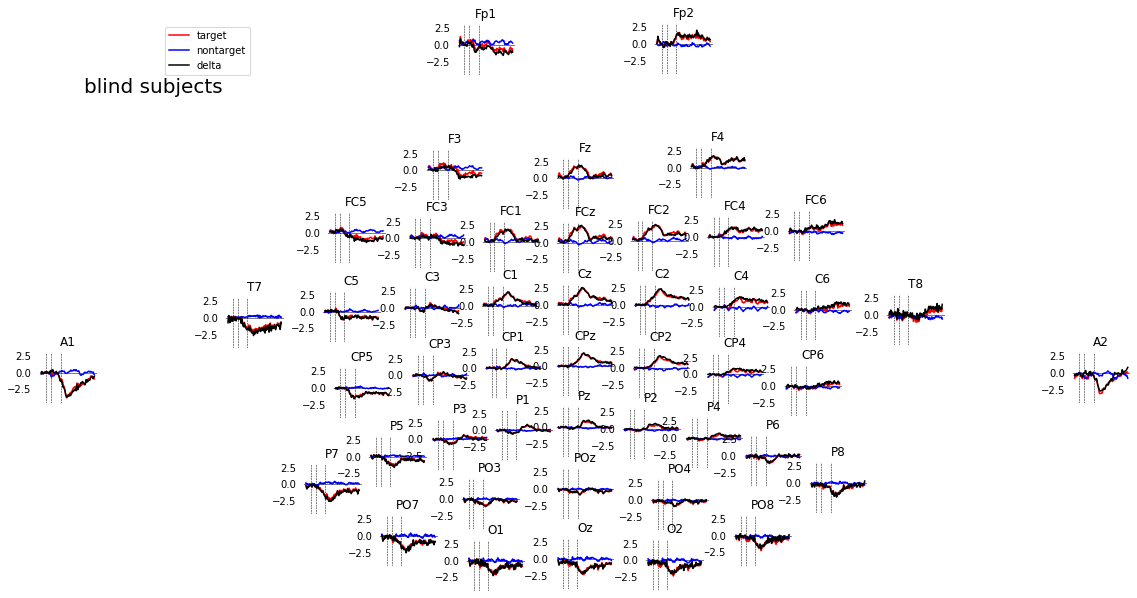

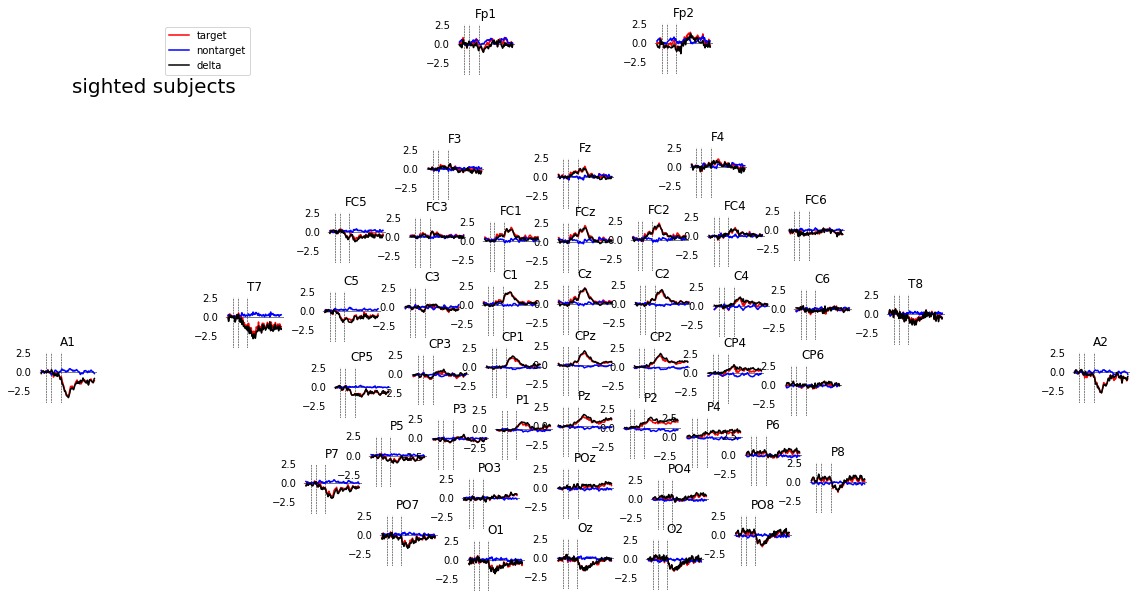

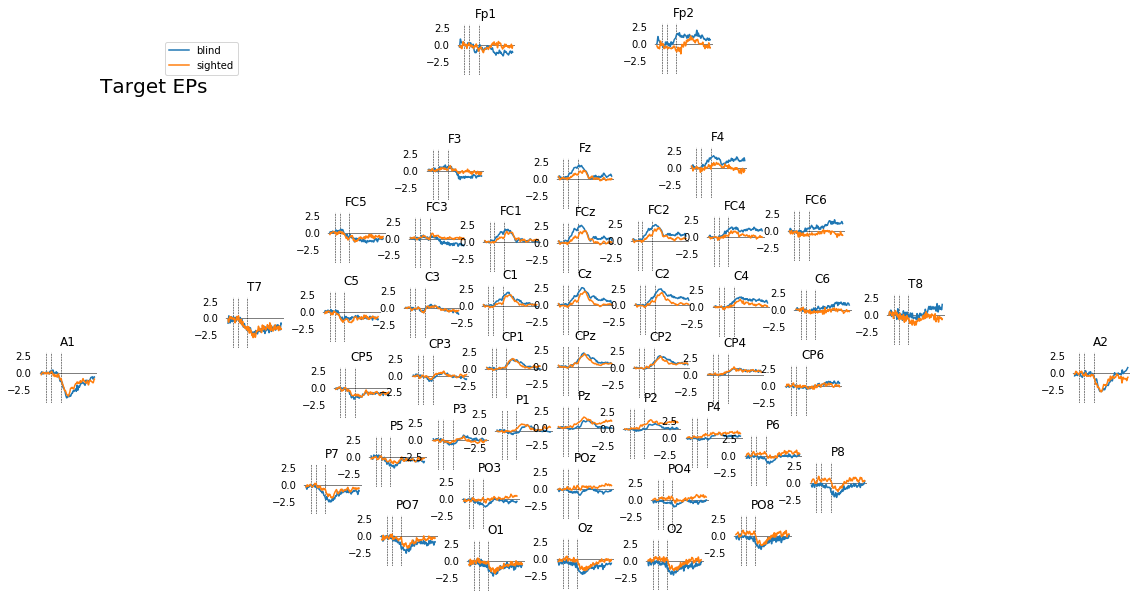

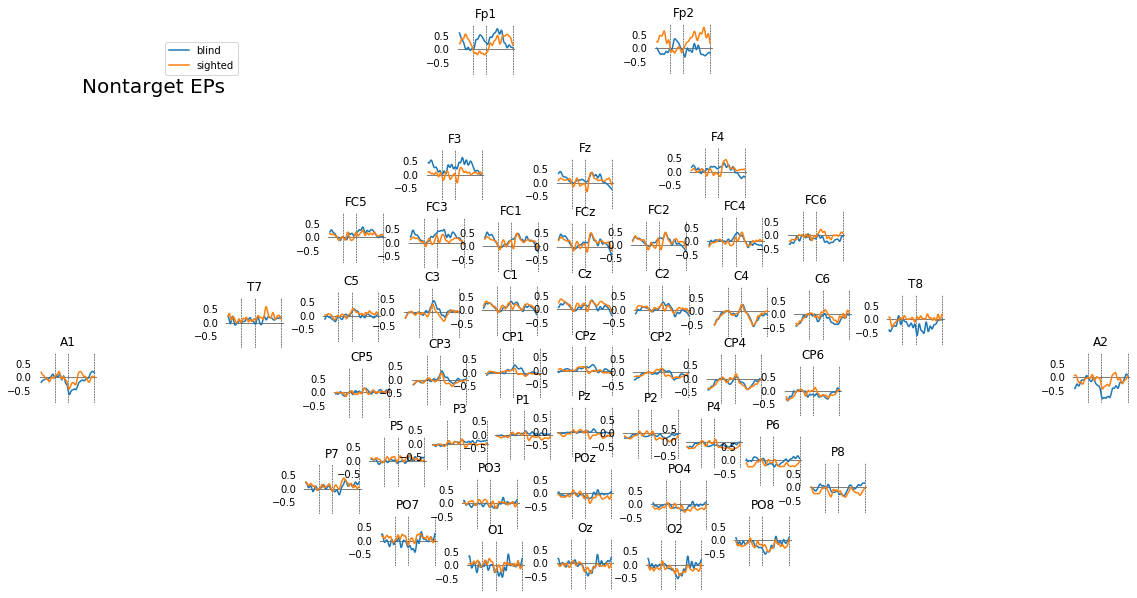

C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\User\Miniconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


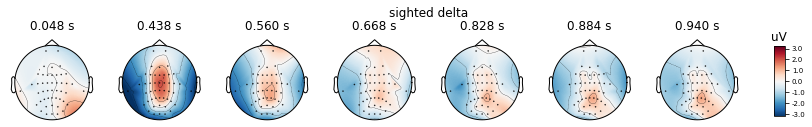

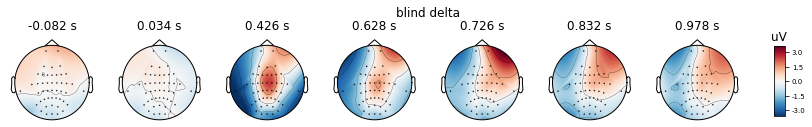

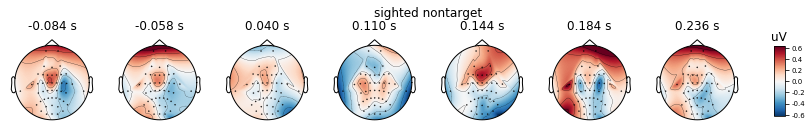

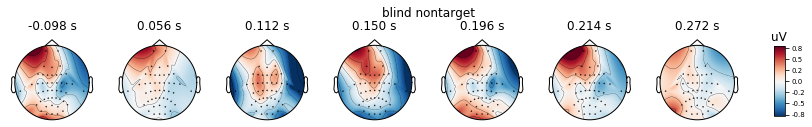

In [5]:
# blind vs sighted
reg = 'brl_static6_all1'

subset_blind = ds.markup.loc[ (ds.markup['blind'] == 1) &
                              (ds.markup['reg'] == reg)
                            ]
payload_blind = aps.subset(ds, subset_blind)

subset_sighted = ds.markup.loc[ (ds.markup['blind'] == 0) &
                              (ds.markup['reg'] == reg)
                            ]
payload_sighted = aps.subset(ds, subset_sighted)


aps.plot_evoked_response(data=payload_blind,
                         title='blind subjects')

aps.plot_evoked_response(data=payload_sighted,
                        title='sighted subjects')

aps.plot_evoked_response(data={'blind': payload_blind['delta'],
                               'sighted': payload_sighted['delta']
                                },
                                title='Target EPs')

aps.plot_evoked_response(data = {'blind': payload_blind['nontarget'].crop(tmax=0.3),
                                'sighted': payload_sighted['nontarget'].crop(tmax=0.3)
                                },
                                title='Nontarget EPs')


p = payload_sighted['delta'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
p.suptitle('sighted delta')
p.show()

p = payload_blind['delta'].plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
p.suptitle('blind delta')
p.show()


p = payload_sighted['nontarget'].crop(tmax=0.3).plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
p.suptitle('sighted nontarget')
p.show()

p = payload_blind['nontarget'].crop(tmax=0.3).plot_topomap(times='peaks', scalings={'eeg':1}, show=False)
p.suptitle('blind nontarget')
p.show()
